In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/content/adm_data.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [16]:
df['Research'].value_counts()

1    219
0    181
Name: Research, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df['Research'].value_counts()

1    219
0    181
Name: Research, dtype: int64

In [8]:
sns.set_style('darkgrid')
sns.set_palette("hls")

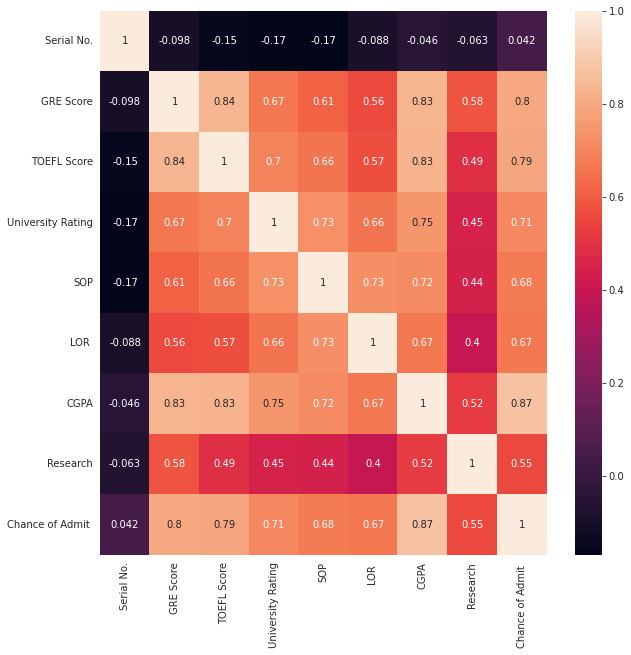

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [10]:
df.info

<bound method DataFrame.info of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chan

In [11]:
x = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

In [13]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
rmse = []
mae = []
r2 = []
model_names = []

# Linear Regression, RandomForestRegressor , GradientBoostingRegressor, KNeigborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
lr = LinearRegression()
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
neighbors = KNeighborsRegressor()

models = [lr,rf,gbr,neighbors]

for i in models:
  i.fit(x_train,y_train)
  y_pred =i.predict(x_test)
  rmse.append(round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
  mae.append(round(np.sqrt(mean_absolute_error(y_test,y_pred)),2))
  r2.append(round(r2_score(y_test,y_pred), 2))
  
  print(f'model: {i} and rmse score is: {round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)}, mae score is: {round(np.sqrt(mean_absolute_error(y_test, y_pred)), 2)} r2_score is: {round(r2_score(y_test, y_pred), 2)}')

model_names = ['LinearRegression','RandomForestRegressor', 'GradientBoostRegressor', 'KNeighborsRegressor']

result_df = pd.DataFrame({'RMSE': rmse, 'MAE': mae, 'R2_SCORE': r2}, index = model_names)
result_df



model: LinearRegression() and rmse score is: 0.06, mae score is: 0.21 r2_score is: 0.84
model: RandomForestRegressor() and rmse score is: 0.06, mae score is: 0.2 r2_score is: 0.84
model: GradientBoostingRegressor() and rmse score is: 0.05, mae score is: 0.19 r2_score is: 0.88
model: KNeighborsRegressor() and rmse score is: 0.08, mae score is: 0.24 r2_score is: 0.75


,RMSE,MAE,R2_SCORE
LinearRegression,0.06,0.21,0.84
RandomForestRegressor,0.06,0.20,0.84
GradientBoostRegressor,0.05,0.19,0.88
KNeighborsRegressor,0.08,0.24,0.75


In [20]:
#  Regression Score of the model
print('Score For Train Data : {}'.format(lr.score(x_train,y_train)))
print('Score For Test Data : {}'.format(lr.score(x_test,y_test)))

Score For Train Data : 0.8103636121218251
Score For Test Data : 0.8399002024491516


Text(0, 0.5, 'predictions')

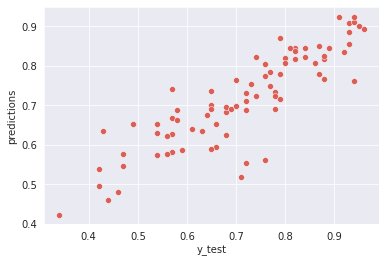

In [15]:
sns.scatterplot(x=y_test, y=y_pred);
plt.xlabel('y_test')
plt.ylabel('predictions')